In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
display(train_df.shape)
train_df.head()

(1460, 81)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


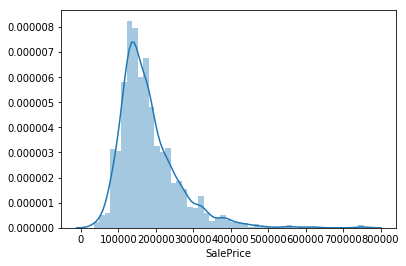

In [4]:
# 目的変数のプロット
train_labels = train_df.SalePrice
ax = sns.distplot(train_labels)

In [5]:
# Nanデータ
NAs = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
display(len(NAs[NAs.sum(axis=1) > 0]))
NAs[NAs.sum(axis=1) > 0]

34

,Train,Test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


# 数値データのみを取り出す

In [6]:
num_df = train_df.select_dtypes(exclude='O')
num_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


# 数値以外のデータを取り出す

In [7]:
object_df = train_df.select_dtypes(include='O')
object_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [8]:
# ラベルをまとめる
new_object_df = pd.DataFrame()street, landshape, landslope, bldtype, exterqual

In [9]:
# MSZoning
col_name = 'MSZoning'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Series([], Name: MSZoning, dtype: object)

In [10]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x not in ['C (all)', 'RH', 'FV'] and not None else 'Others')
new_object_df[col_name].value_counts()

RL        1151
RM         218
Others      91
Name: MSZoning, dtype: int64

In [11]:
# Street
col_name = 'Street'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Pave    1454
Grvl       6
Name: Street, dtype: int64

Series([], Name: Street, dtype: object)

In [12]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['Slab', 'Stone', 'Wood'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [13]:
# Alley
col_name = 'Alley'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Grvl    50
Pave    41
Name: Alley, dtype: int64

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
31      NaN
       ... 
1428    NaN
1429    NaN
1430    NaN
1431    NaN
1433    NaN
1434    NaN
1435    NaN
1436    NaN
1437    NaN
1438    NaN
1439    NaN
1440    NaN
1441    NaN
1442    NaN
1443    NaN
1444    NaN
1445    NaN
1446    NaN
1447    NaN
1448    NaN
1449    NaN
1450    NaN
1451    NaN
1452    NaN
1453    NaN
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: Alley, Length: 1369, dtype: object

In [14]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Others    1369
Grvl        50
Pave        41
Name: Alley, dtype: int64

In [16]:
# LotShape
col_name = 'LotShape'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Series([], Name: LotShape, dtype: object)

In [17]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['Slab', 'Stone', 'Wood'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [105]:
# LandContour
col_name = 'LandContour'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Series([], Name: LandContour, dtype: object)

In [107]:
# Utilities
col_name = 'Utilities'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Series([], Name: Utilities, dtype: object)

In [108]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [113]:
# LotConfig
col_name = 'LotConfig'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Series([], Name: LotConfig, dtype: object)

In [114]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['FR2', 'FR3'] else 'FR')
display(new_object_df[col_name].value_counts())
col_name = ''

Inside     1052
Corner      263
CulDSac      94
FR           51
Name: LotConfig, dtype: int64

In [115]:
# LandSlope
col_name = 'LandSlope'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Series([], Name: LandSlope, dtype: object)

In [116]:
# Neighborhood
col_name = 'Neighborhood'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Series([], Name: Neighborhood, dtype: object)

In [120]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['NPkVill','Blueste'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Others      11
Veenker     11
Name: Neighborhood, dtype: int64

In [125]:
# Condition1
col_name = 'Condition1'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Series([], Name: Condition1, dtype: object)

In [126]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['PosA','RRNn', 'RRNe'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
Others      15
RRAe        11
Name: Condition1, dtype: int64

In [127]:
# Condition2
col_name = 'Condition2'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

Series([], Name: Condition2, dtype: object)

In [128]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x in ['Norm'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Norm      1445
Others      15
Name: Condition2, dtype: int64

In [131]:
# BldgType
col_name = 'BldgType'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

Series([], Name: BldgType, dtype: object)

In [132]:
# HouseStyle
col_name = 'HouseStyle'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Series([], Name: HouseStyle, dtype: object)

In [133]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['1.5Unf', '2.5Unf', '2.5Fin'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
Others     33
Name: HouseStyle, dtype: int64

In [134]:
# RoofStyle
col_name = 'RoofStyle'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

Series([], Name: RoofStyle, dtype: object)

In [135]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x in ['Gable', 'Hip'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Gable     1141
Hip        286
Others      33
Name: RoofStyle, dtype: int64

In [136]:
# RoofMatl
col_name = 'RoofMatl'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
ClyTile       1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

Series([], Name: RoofMatl, dtype: object)

In [137]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x in ['CompShg'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

CompShg    1434
Others       26
Name: RoofMatl, dtype: int64

In [139]:
# Exterior1st
col_name = 'Exterior1st'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

Series([], Name: Exterior1st, dtype: object)

In [140]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['BrkComm', 'Stone', 'CBlock', 'AsphShn', 'ImStucc'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Others       7
Name: Exterior1st, dtype: int64

In [141]:
# Exterior2nd
col_name = 'Exterior2nd'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

Series([], Name: Exterior2nd, dtype: object)

In [142]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['Brk Cmn', 'Stone', 'AsphShn', 'Other', 'CBlock'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
Others      17
ImStucc     10
Name: Exterior2nd, dtype: int64

In [147]:
# MasVnrType
col_name = 'MasVnrType'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
Name: MasVnrType, dtype: object

In [148]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['BrkCmn'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

None       864
BrkFace    445
Stone      128
Others      23
Name: MasVnrType, dtype: int64

In [149]:
# ExterQual
col_name = 'ExterQual'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

Series([], Name: ExterQual, dtype: object)

In [153]:
# ExterCond
col_name = 'ExterCond'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

Series([], Name: ExterCond, dtype: object)

In [154]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['Fa', 'Ex', 'Po'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

TA        1282
Gd         146
Others      32
Name: ExterCond, dtype: int64

In [155]:
# Foundation
col_name = 'Foundation'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

Series([], Name: Foundation, dtype: object)

In [156]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['Slab', 'Stone', 'Wood'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

PConc     647
CBlock    634
BrkTil    146
Others     33
Name: Foundation, dtype: int64

In [157]:
# BsmtQual
col_name = 'BsmtQual'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtQual, dtype: object

In [158]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['Fa'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

TA        649
Gd        618
Ex        121
Others     72
Name: BsmtQual, dtype: int64

In [159]:
# BsmtCond
col_name = 'BsmtCond'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtCond, dtype: object

In [160]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['Po'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

TA        1311
Gd          65
Fa          45
Others      39
Name: BsmtCond, dtype: int64

In [161]:
# BsmtExposure
col_name = 'BsmtExposure'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
948     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtExposure, dtype: object

In [162]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

No        953
Av        221
Gd        134
Mn        114
Others     38
Name: BsmtExposure, dtype: int64

In [163]:
# BsmtFinType1
col_name = 'BsmtFinType1'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtFinType1, dtype: object

In [164]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['LwQ'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Unf       430
GLQ       418
ALQ       220
BLQ       148
Rec       133
Others    111
Name: BsmtFinType1, dtype: int64

In [165]:
# BsmtFinType2
col_name = 'BsmtFinType2'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
332     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtFinType2, dtype: object

In [166]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x in ['Unf'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Unf       1256
Others     204
Name: BsmtFinType2, dtype: int64

In [167]:
# Heating
col_name = 'Heating'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Series([], Name: Heating, dtype: object)

In [168]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x in ['GasA'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

GasA      1428
Others      32
Name: Heating, dtype: int64

In [171]:
# HeatingQC
col_name = 'HeatingQC'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

Series([], Name: HeatingQC, dtype: object)

In [172]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['Po', 'Fa', 'Gd'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Ex        741
TA        428
Others    291
Name: HeatingQC, dtype: int64

In [173]:
# CentralAir
col_name = 'CentralAir'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Y    1365
N      95
Name: CentralAir, dtype: int64

Series([], Name: CentralAir, dtype: object)

In [174]:
# Electrical
col_name = 'Electrical'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

1379    NaN
Name: Electrical, dtype: object

In [175]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x in ['SBrkr'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

SBrkr     1334
Others     126
Name: Electrical, dtype: int64

In [176]:
# KitchenQual
col_name = 'KitchenQual'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

Series([], Name: KitchenQual, dtype: object)

In [177]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['Fa', 'Ex'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

TA        735
Gd        586
Others    139
Name: KitchenQual, dtype: int64

In [180]:
# Functional
col_name = 'Functional'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

Series([], Name: Functional, dtype: object)

In [181]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x in ['Typ'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Typ       1360
Others     100
Name: Functional, dtype: int64

In [184]:
# FireplaceQu
col_name = 'FireplaceQu'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

0       NaN
5       NaN
10      NaN
12      NaN
15      NaN
17      NaN
18      NaN
19      NaN
26      NaN
29      NaN
30      NaN
31      NaN
32      NaN
36      NaN
38      NaN
39      NaN
42      NaN
43      NaN
44      NaN
47      NaN
48      NaN
49      NaN
50      NaN
52      NaN
56      NaN
57      NaN
59      NaN
60      NaN
61      NaN
63      NaN
       ... 
1391    NaN
1397    NaN
1398    NaN
1403    NaN
1404    NaN
1406    NaN
1407    NaN
1408    NaN
1410    NaN
1411    NaN
1412    NaN
1416    NaN
1418    NaN
1422    NaN
1425    NaN
1431    NaN
1432    NaN
1436    NaN
1438    NaN
1444    NaN
1445    NaN
1446    NaN
1448    NaN
1449    NaN
1450    NaN
1452    NaN
1453    NaN
1454    NaN
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 690, dtype: object

In [185]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x in ['Gd', 'TA'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Others    767
Gd        380
TA        313
Name: FireplaceQu, dtype: int64

In [186]:
# GarageType
col_name = 'GarageType'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

39      NaN
48      NaN
78      NaN
88      NaN
89      NaN
99      NaN
108     NaN
125     NaN
127     NaN
140     NaN
148     NaN
155     NaN
163     NaN
165     NaN
198     NaN
210     NaN
241     NaN
250     NaN
287     NaN
291     NaN
307     NaN
375     NaN
386     NaN
393     NaN
431     NaN
434     NaN
441     NaN
464     NaN
495     NaN
520     NaN
       ... 
954     NaN
960     NaN
968     NaN
970     NaN
976     NaN
1009    NaN
1011    NaN
1030    NaN
1038    NaN
1096    NaN
1123    NaN
1131    NaN
1137    NaN
1143    NaN
1173    NaN
1179    NaN
1218    NaN
1219    NaN
1234    NaN
1257    NaN
1283    NaN
1323    NaN
1325    NaN
1326    NaN
1337    NaN
1349    NaN
1407    NaN
1449    NaN
1450    NaN
1453    NaN
Name: GarageType, Length: 81, dtype: object

In [187]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x in ['Attchd', 'Detchd'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Attchd    870
Detchd    387
Others    203
Name: GarageType, dtype: int64

In [188]:
# GarageFinish
col_name = 'GarageFinish'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

39      NaN
48      NaN
78      NaN
88      NaN
89      NaN
99      NaN
108     NaN
125     NaN
127     NaN
140     NaN
148     NaN
155     NaN
163     NaN
165     NaN
198     NaN
210     NaN
241     NaN
250     NaN
287     NaN
291     NaN
307     NaN
375     NaN
386     NaN
393     NaN
431     NaN
434     NaN
441     NaN
464     NaN
495     NaN
520     NaN
       ... 
954     NaN
960     NaN
968     NaN
970     NaN
976     NaN
1009    NaN
1011    NaN
1030    NaN
1038    NaN
1096    NaN
1123    NaN
1131    NaN
1137    NaN
1143    NaN
1173    NaN
1179    NaN
1218    NaN
1219    NaN
1234    NaN
1257    NaN
1283    NaN
1323    NaN
1325    NaN
1326    NaN
1337    NaN
1349    NaN
1407    NaN
1449    NaN
1450    NaN
1453    NaN
Name: GarageFinish, Length: 81, dtype: object

In [189]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Unf       605
RFn       422
Fin       352
Others     81
Name: GarageFinish, dtype: int64

In [190]:
# GarageQual
col_name = 'GarageQual'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

39      NaN
48      NaN
78      NaN
88      NaN
89      NaN
99      NaN
108     NaN
125     NaN
127     NaN
140     NaN
148     NaN
155     NaN
163     NaN
165     NaN
198     NaN
210     NaN
241     NaN
250     NaN
287     NaN
291     NaN
307     NaN
375     NaN
386     NaN
393     NaN
431     NaN
434     NaN
441     NaN
464     NaN
495     NaN
520     NaN
       ... 
954     NaN
960     NaN
968     NaN
970     NaN
976     NaN
1009    NaN
1011    NaN
1030    NaN
1038    NaN
1096    NaN
1123    NaN
1131    NaN
1137    NaN
1143    NaN
1173    NaN
1179    NaN
1218    NaN
1219    NaN
1234    NaN
1257    NaN
1283    NaN
1323    NaN
1325    NaN
1326    NaN
1337    NaN
1349    NaN
1407    NaN
1449    NaN
1450    NaN
1453    NaN
Name: GarageQual, Length: 81, dtype: object

In [191]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x in ['TA'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

TA        1311
Others     149
Name: GarageQual, dtype: int64

In [192]:
# GarageCond
col_name = 'GarageCond'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

39      NaN
48      NaN
78      NaN
88      NaN
89      NaN
99      NaN
108     NaN
125     NaN
127     NaN
140     NaN
148     NaN
155     NaN
163     NaN
165     NaN
198     NaN
210     NaN
241     NaN
250     NaN
287     NaN
291     NaN
307     NaN
375     NaN
386     NaN
393     NaN
431     NaN
434     NaN
441     NaN
464     NaN
495     NaN
520     NaN
       ... 
954     NaN
960     NaN
968     NaN
970     NaN
976     NaN
1009    NaN
1011    NaN
1030    NaN
1038    NaN
1096    NaN
1123    NaN
1131    NaN
1137    NaN
1143    NaN
1173    NaN
1179    NaN
1218    NaN
1219    NaN
1234    NaN
1257    NaN
1283    NaN
1323    NaN
1325    NaN
1326    NaN
1337    NaN
1349    NaN
1407    NaN
1449    NaN
1450    NaN
1453    NaN
Name: GarageCond, Length: 81, dtype: object

In [193]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x in ['TA'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

TA        1326
Others     134
Name: GarageCond, dtype: int64

In [194]:
# PavedDrive
col_name = 'PavedDrive'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

Series([], Name: PavedDrive, dtype: object)

In [195]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['N', 'P'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Y         1340
Others     120
Name: PavedDrive, dtype: int64

In [196]:
# PoolQC
col_name = 'PoolQC'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
1430    NaN
1431    NaN
1432    NaN
1433    NaN
1434    NaN
1435    NaN
1436    NaN
1437    NaN
1438    NaN
1439    NaN
1440    NaN
1441    NaN
1442    NaN
1443    NaN
1444    NaN
1445    NaN
1446    NaN
1447    NaN
1448    NaN
1449    NaN
1450    NaN
1451    NaN
1452    NaN
1453    NaN
1454    NaN
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1453, dtype: object

In [197]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan else 'None')
display(new_object_df[col_name].value_counts())
col_name = ''

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

In [123]:
object_df.keys()

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [198]:
# Fence
col_name = 'Fence'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
16      NaN
17      NaN
18      NaN
20      NaN
22      NaN
23      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
       ... 
1421    NaN
1422    NaN
1425    NaN
1426    NaN
1427    NaN
1429    NaN
1430    NaN
1431    NaN
1432    NaN
1433    NaN
1434    NaN
1437    NaN
1439    NaN
1440    NaN
1441    NaN
1442    NaN
1443    NaN
1444    NaN
1445    NaN
1446    NaN
1447    NaN
1449    NaN
1450    NaN
1451    NaN
1452    NaN
1453    NaN
1454    NaN
1455    NaN
1458    NaN
1459    NaN
Name: Fence, Length: 1179, dtype: object

In [199]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan else 'None')
display(new_object_df[col_name].value_counts())
col_name = ''

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [200]:
# MiscFeature
col_name = 'MiscFeature'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
6       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
32      NaN
33      NaN
       ... 
1429    NaN
1430    NaN
1431    NaN
1432    NaN
1433    NaN
1434    NaN
1435    NaN
1436    NaN
1437    NaN
1438    NaN
1439    NaN
1440    NaN
1441    NaN
1442    NaN
1443    NaN
1444    NaN
1445    NaN
1446    NaN
1447    NaN
1448    NaN
1449    NaN
1450    NaN
1451    NaN
1452    NaN
1453    NaN
1454    NaN
1455    NaN
1456    NaN
1458    NaN
1459    NaN
Name: MiscFeature, Length: 1406, dtype: object

In [201]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Others    1406
Shed        49
Othr         2
Gar2         2
TenC         1
Name: MiscFeature, dtype: int64

In [202]:
# SaleType
col_name = 'SaleType'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

Series([], Name: SaleType, dtype: object)

In [203]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x in ['WD', 'New'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

WD        1267
New        122
Others      71
Name: SaleType, dtype: int64

In [204]:
# SaleCondition
col_name = 'SaleCondition'
display(object_df[col_name].value_counts())
object_df[col_name][object_df[col_name].isnull()]

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

Series([], Name: SaleCondition, dtype: object)

In [205]:
new_object_df[col_name] = object_df[col_name].apply(lambda x: x if x is not np.nan and x not in ['Family', 'Alloca', 'AdjLand'] else 'Others')
display(new_object_df[col_name].value_counts())
col_name = ''

Normal     1198
Partial     125
Abnorml     101
Others       36
Name: SaleCondition, dtype: int64

In [207]:
display(new_object_df.shape == object_df.shape)
new_object_df.head()

False

,MSZoning,Alley,LandContour,Utilities,LotConfig_cat,LotConfig,Neighborhood,Condition1,Condition2,HouseStyle,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Others,Lvl,AllPub,Inside,Inside,CollgCr,Norm,Norm,2Story,...,Attchd,RFn,TA,TA,Y,None,None,Others,WD,Normal
1,RL,Others,Lvl,AllPub,FR,FR,Veenker,Feedr,Norm,1Story,...,Attchd,RFn,TA,TA,Y,None,None,Others,WD,Normal
2,RL,Others,Lvl,AllPub,Inside,Inside,CollgCr,Norm,Norm,2Story,...,Attchd,RFn,TA,TA,Y,None,None,Others,WD,Normal
3,RL,Others,Lvl,AllPub,Corner,Corner,Crawfor,Norm,Norm,2Story,...,Detchd,Unf,TA,TA,Y,None,None,Others,WD,Abnorml
4,RL,Others,Lvl,AllPub,FR,FR,NoRidge,Norm,Norm,2Story,...,Attchd,RFn,TA,TA,Y,None,None,Others,WD,Normal


In [209]:
object_df.keys()

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [210]:
new_object_df.keys()

Index(['MSZoning', 'Alley', 'LandContour', 'Utilities', 'LotConfig_cat',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
street, landshape, landslope, bldtype, exterqual